<a href="https://colab.research.google.com/github/JairEsc/Aprendizaje/blob/main/CAMDA/pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejemplo de red de neuronas para clasificación usando Pytorch

Consideramos datos del CAMDA 2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [22]:
otus=pd.read_csv('camda_relative.csv', index_col=0, low_memory=False)
print(otus.shape)
otus.head()

(286, 18295)


,ID_city,City,Latitude,Longitude,Climate,Year,468,469,28090,2708348,...,1146874,1519389,12480,1131,2886895,546184,12330,1922682,1513254,1922952
ID,,,,,,,,,,,,,,,,,,,,,
CAMDA23_MetaSUB_gCSD16_AKL_10,AKL,Auckland,-36.75,174.75,Cfb,2016,0.048249,10.696605,14.560432,1.407184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAMDA23_MetaSUB_gCSD16_AKL_11,AKL,Auckland,-36.75,174.75,Cfb,2016,0.038155,0.527739,0.041985,0.006187,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAMDA23_MetaSUB_gCSD16_AKL_12,AKL,Auckland,-36.75,174.75,Cfb,2016,0.002185,0.234138,0.051282,0.004188,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAMDA23_MetaSUB_gCSD16_AKL_13,AKL,Auckland,-36.75,174.75,Cfb,2016,0.000142,0.014304,0.010763,0.001360,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CAMDA23_MetaSUB_gCSD16_AKL_14,AKL,Auckland,-36.75,174.75,Cfb,2016,0.002103,0.061997,0.079509,0.003771,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Después:  (286, 18293)


<ipython-input-23-9a748b6b64f9>:11: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  plt.bar(otus['City'].value_counts().index.ravel(),otus['City'].value_counts(),)


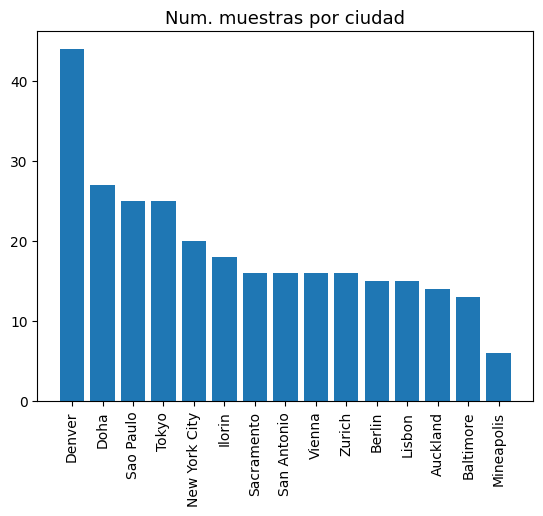

In [23]:
from sklearn.preprocessing import LabelEncoder

X_names = otus.drop(['ID_city','City','Latitude','Longitude','Climate','Year'],axis=1).columns
drops=[]
for name in X_names:
    if('\x10.001308923774823973' in np.array(otus[name]) or '0.001215429219479$037' in np.array(otus[name]) ):
        otus=otus.drop(name,axis=1)
        X_names=X_names.drop(name)
        drops.append(name)
print("Después: ",otus.shape)
plt.bar(otus['City'].value_counts().index.ravel(),otus['City'].value_counts(),)
plt.title("Num. muestras por ciudad", fontsize=13)
plt.tick_params(axis='x', labelrotation=90)
X = otus[X_names]
Y_city=np.array(otus['City']).ravel()
le = LabelEncoder()
le.fit(Y_city)
#le.classes_
y_cat = le.transform(Y_city)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=0)
plt.show()

In [5]:
!pip install contextily
import contextily as ctx
import geopandas as gpd
import numpy as np
conteo_por_ciudad=[]

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [7]:
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

Hasta aquí logré correrlo. Antes de pasarlos a tensores

In [27]:
# Turn data into tensors
X_train=np.vstack(X_train).astype(float)
X_train = torch.tensor(X_train)
y_train=torch.from_numpy(y_train).type(torch.LongTensor)
X_test = np.vstack(X_test).astype(float)
X_test = torch.tensor(X_test)
y_test = torch.from_numpy(y_test).type(torch.LongTensor)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


In [ ]:
class nnet_otus(nn.Module):
    def __init__(self, input_features, output_features):
        super(nnet_otus, self).__init__()
        self.seq = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=1200),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=1200, out_features=520),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=520, out_features=300),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=300, out_features=300),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(in_features=300, out_features=100),
            nn.ReLU(),
            nn.Linear(in_features=100, out_features=output_features),
        )

    def forward(self, x):
        return self.seq(x)

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(X_train, y_train)
val_data = TensorDataset(X_val, y_val)

batch_size_val = 16
batch_size_tr = 32
# Builds a loader for each dataset to perform mini-batch gradient descent
train_loader = DataLoader(dataset=train_data, batch_size=batch_size_tr, shuffle=False)
val_loader = DataLoader(dataset=val_data, batch_size=batch_size_val, shuffle=False)

In [ ]:
# Set the hyperparameters for data creation
NUM_CLASSES = len(le.classes_)
NUM_FEATURES = X_train.shape[1]

# Create an instance of the model and send it to target device
model = nnet_otus(NUM_FEATURES, NUM_CLASSES).to(device)

# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, weight_decay=1e-5)

# Fit the model
torch.manual_seed(42)
epochs = 200
# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model.train()
    for x_batch, y_batch in train_loader:

      # 1. Forward pass (model outputs raw logits)
      y_logits = model(x_batch) # model outputs raw logits
      y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels

      # 2. Calculate loss/accuracy
      loss = loss_fn(y_logits, y_batch)
      acc = accuracy_score(y_batch.detach().cpu().numpy(), y_pred.detach().cpu().numpy())

      # 3. Optimizer zero grad
      optimizer.zero_grad()

      # 4. Loss backwards
      loss.backward()

      # 5. Optimizer step
      optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
      # Uses loader to fetch one mini-batch for validation
      for x_batch, y_batch in val_loader:
          # 1. Forward pass
          test_logits = model(x_batch)
          test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
          # 2. Caculate loss/accuracy
          test_loss = loss_fn(test_logits, y_batch)
          test_acc = accuracy_score(y_batch.detach().cpu().numpy(), test_pred.detach().cpu().numpy())

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Validation loss: {test_loss:.5f}, Validation acc:{test_acc:.5f}")